In [8]:
import numpy as np
# loading finance data
import yfinance as yf
df = yf.download(tickers='SPY', period='max')
df.head()

C:\Users\devpa\AppData\Local\Temp\ipykernel_31344\890732883.py:3: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(tickers='SPY', period='max')
[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,SPY,SPY,SPY,SPY,SPY
Date,,,,,
1993-01-29,24.380442,24.397782,24.276400,24.397782,1003200
1993-02-01,24.553848,24.553848,24.397786,24.397786,480500
1993-02-02,24.605867,24.623208,24.484485,24.536506,201300
1993-02-03,24.865980,24.883320,24.623216,24.640556,529400
1993-02-04,24.970016,25.022037,24.675232,24.952676,531500


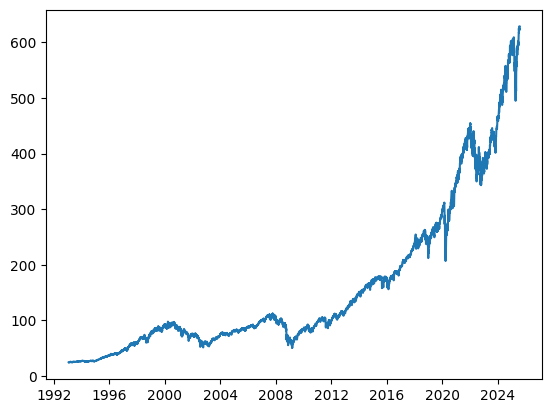

In [59]:
import matplotlib.pyplot as plt
plt.plot(df['Close'])


C:\Users\devpa\AppData\Local\Temp\ipykernel_31344\3791151583.py:4: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(tickers=TICKER, period='max')
[*********************100%***********************]  1 of 1 completed


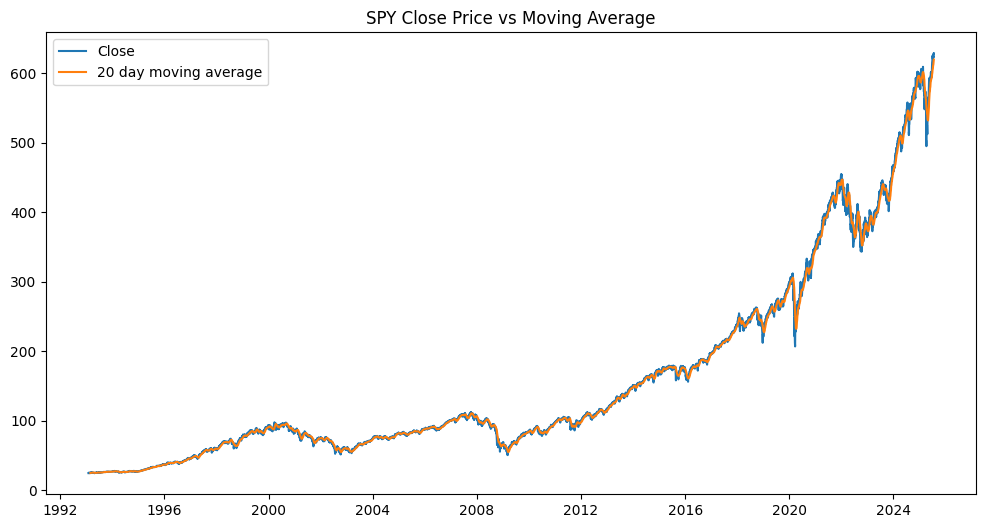

In [76]:
# putting it altogether to plot graph comparing moving average with the actual data
TICKER = 'SPY'
WINDOW = 20
df = yf.download(tickers=TICKER, period='max')

df['Moving Avg'] = df['Close'].rolling(WINDOW).mean()

plt.figure(figsize=(12, 6))
plt.plot(df['Close'], label='Close')
plt.plot(df['Moving Avg'], label=f'{WINDOW} day moving average')
plt.title(f"{TICKER} Close Price vs Moving Average")
plt.legend()
plt.show()


In [77]:
df.columns = df.columns.get_level_values(0)
df

Price,Close,High,Low,Open,Volume,Moving Avg
Date,,,,,,
1993-01-29,24.380436,24.397776,24.276394,24.397776,1003200,NaN
1993-02-01,24.553837,24.553837,24.397774,24.397774,480500,NaN
1993-02-02,24.605865,24.623206,24.484483,24.536504,201300,NaN
1993-02-03,24.865978,24.883319,24.623214,24.640554,529400,NaN
1993-02-04,24.970013,25.022034,24.675228,24.952672,531500,NaN
...,...,...,...,...,...,...
2025-07-15,622.140015,627.859985,622.059998,627.520020,74317300,613.511075
2025-07-16,624.219971,624.729980,618.049988,623.739990,88987500,614.676895
2025-07-17,628.039978,628.400024,624.179993,624.400024,68885700,616.290454


In [84]:
# building strategy
import numpy as np
def add_ma_strategy(df):
    # we put 1(long) if "Close" > "Moving Avg" else -1(short)
    df["Strategy"] = np.where(df['Close'] > df['Moving Avg'], 1, -1)
    return df
df = add_ma_strategy(df)
# normal cumulative return
df["asset_cumulate"] = np.cumprod(1 + df["Close"].pct_change()) - 1
# with strategy
df["strategy_cumulate"] = np.cumprod(1 + df["Close"].pct_change() * df["Strategy"].shift()) - 1
df

Price,Close,High,Low,Open,Volume,Moving Avg,Strategy,asset_cumulate,strategy_cumulate
Date,,,,,,,,,
1993-01-29,24.380436,24.397776,24.276394,24.397776,1003200,NaN,-1,NaN,NaN
1993-02-01,24.553837,24.553837,24.397774,24.397774,480500,NaN,-1,0.007112,-0.007112
1993-02-02,24.605865,24.623206,24.484483,24.536504,201300,NaN,-1,0.009246,-0.009216
1993-02-03,24.865978,24.883319,24.623214,24.640554,529400,NaN,-1,0.019915,-0.019690
1993-02-04,24.970013,25.022034,24.675228,24.952672,531500,NaN,-1,0.024182,-0.023791
...,...,...,...,...,...,...,...,...,...
2025-07-15,622.140015,627.859985,622.059998,627.520020,74317300,613.511075,1,24.518002,-0.721444
2025-07-16,624.219971,624.729980,618.049988,623.739990,88987500,614.676895,1,24.603315,-0.720513
2025-07-17,628.039978,628.400024,624.179993,624.400024,68885700,616.290454,1,24.759998,-0.718802


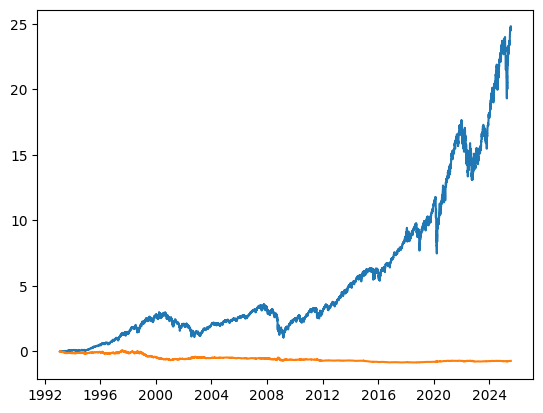

In [85]:
plt.plot(df["asset_cumulate"])
plt.plot(df["strategy_cumulate"]);

C:\Users\devpa\AppData\Local\Temp\ipykernel_31344\1012931786.py:8: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(tickers=TICKER, period='max')
[*********************100%***********************]  1 of 1 completed


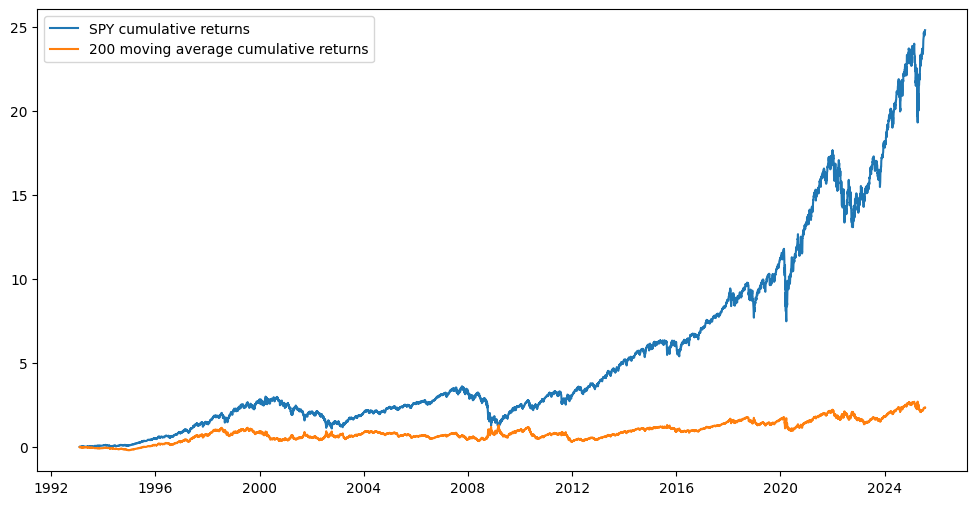

In [136]:
# simple moving average strategy implementation
# only 1 parameter to change i.e WINDOW size
# as per the observations it does not outperform the stock itself as clearly seen in the graph
TICKER = 'SPY'
WINDOW = 200

def get_data():
    df = yf.download(tickers=TICKER, period='max')
    # flattening the df to avoid tuple based column name ex("Close", "SPY")
    df.columns = df.columns.get_level_values(0)
    df['Moving Avg'] = df['Close'].rolling(WINDOW).mean()
    return df

def add_strategy(df):
    df["Strategy"] = np.where(df['Close'] > df['Moving Avg'], 1, -1)
    # to avoid lookahead bias shift by 1
    df["Strategy"] = df["Strategy"].shift(1)
    return df

def test_strategy(df):
    df["asset_cumulate"] = np.cumprod(1 + df["Close"].pct_change()) - 1
    df["strategy_cumulate"] = np.cumprod(1 + df["Close"].pct_change() * df["Strategy"]) - 1
    # plot returns
    plt.figure(figsize=(12, 6))
    plt.plot(df["asset_cumulate"], label= f"{TICKER} cumulative returns")
    plt.plot(df["strategy_cumulate"], label= f"{WINDOW} moving average cumulative returns")
    plt.legend()
    plt.show()

def main():
    df = get_data()
    df = add_strategy(df)
    df = test_strategy(df)
    return df

main()

In [1]:
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt

C:\Users\devpa\AppData\Local\Temp\ipykernel_29016\2417915188.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(tickers=TICKER, period='max')
[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume,12_ma,33_ma,Strategy,Asset Returns,Strategy Returns
Date,,,,,,,,,,
2021-09-14,419.734711,423.675289,418.836962,423.467390,78197100,425.216461,421.069182,1.0,NaN,NaN
2021-09-15,423.240631,423.741473,419.044888,420.159965,78792200,425.029823,421.276220,1.0,0.008353,0.008353
2021-09-16,422.569702,423.694210,419.592971,422.711444,77786700,424.631355,421.524209,1.0,0.006754,0.006754
2021-09-17,418.453430,422.217047,418.093180,421.790458,118425000,423.942622,421.673806,1.0,-0.003053,-0.003053
2021-09-20,411.476074,413.865059,406.565339,412.272403,166445500,422.653544,421.510025,1.0,-0.019676,-0.019676
...,...,...,...,...,...,...,...,...,...,...
2025-07-16,624.219971,624.729980,618.049988,623.739990,88987500,622.248337,607.107980,1.0,0.487177,-0.120110
2025-07-17,628.039978,628.400024,624.179993,624.400024,68885700,623.097504,608.311895,1.0,0.496278,-0.114725
2025-07-18,627.580017,629.469971,626.460022,629.299988,65621600,623.925003,609.521812,1.0,0.495183,-0.115374


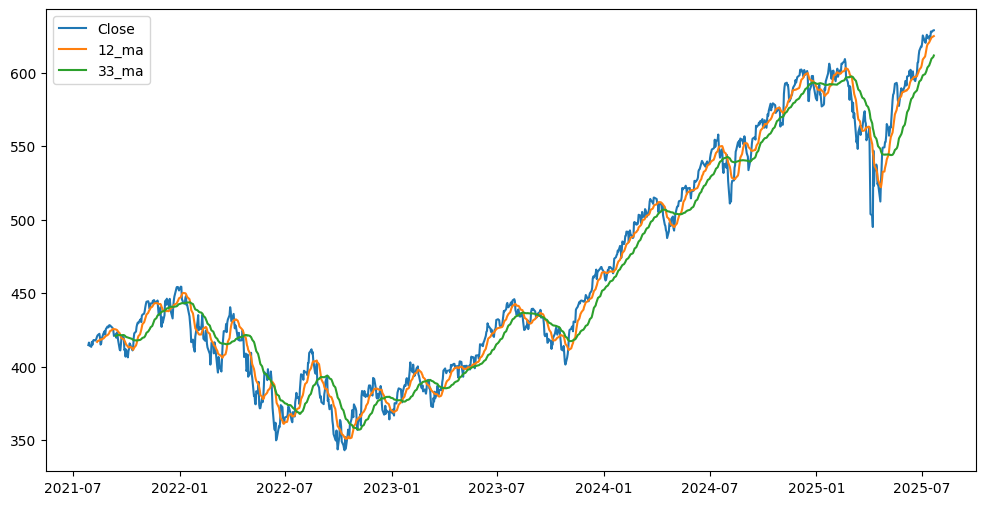

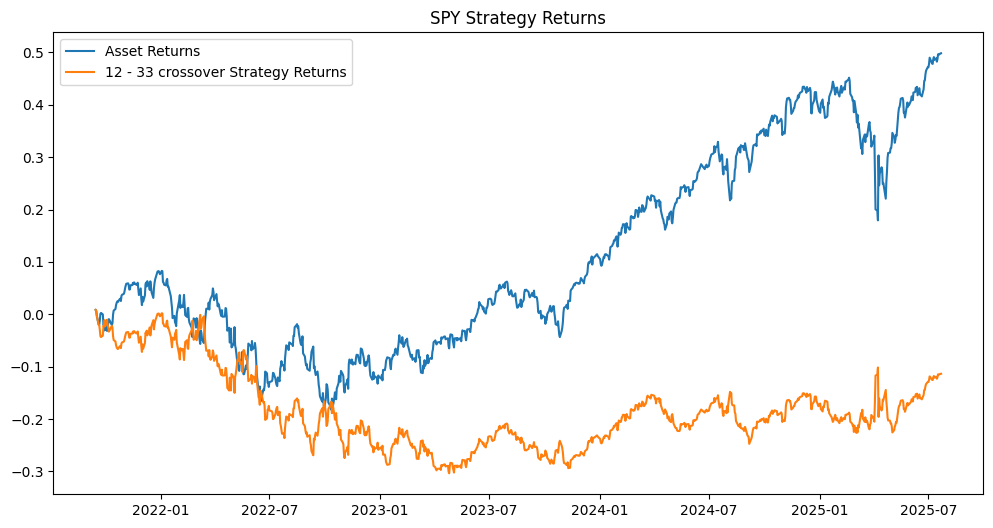

In [46]:
# crossover moving average strategy
# here we have 2 moving average 1 fast and 1 slow and we use them to build our strategy
TICKER = 'SPY'
WINDOW = 200
FAST = 12
SLOW = 33
LOOKBACK = 1000

def get_data():
    df = yf.download(tickers=TICKER, period='max')
    # flattening the df to avoid tuple based column name ex("Close", "SPY")
    df.columns = df.columns.get_level_values(0)
    # looking at the interested subset of data
    subset = df.iloc[-LOOKBACK:, :]
    return subset

def add_moving_averages(df, fast, slow):
    df[f"{fast}_ma"] = df['Close'].rolling(fast).mean()
    df[f"{slow}_ma"] = df['Close'].rolling(slow).mean()
    plt.figure(figsize=(12, 6))
    plt.plot(df['Close'] ,label='Close')
    plt.plot(df[f'{FAST}_ma'], label=f'{FAST}_ma')
    plt.plot(df[f'{SLOW}_ma'], label=f'{SLOW}_ma')
    plt.legend()
    return df.dropna()

def add_strategy(df, fast, slow):
    # when fast_ma is above slow_ma we take long position else we take short positio
    df["Strategy"] = np.where(df[f'{fast}_ma'] > df[f'{slow}_ma'], 1, -1)
    # shifting the 1 back to avoid lookahead
    df["Strategy"] = df["Strategy"].shift(1)
    return df.dropna()

def test_strategy(df, ticker, fast, slow):
    df["Asset Returns"] = np.cumprod(1 + df["Close"].pct_change()) - 1
    df["Strategy Returns"] = np.cumprod(1 + df["Close"].pct_change() * df["Strategy"]) - 1

    plt.figure(figsize=(12, 6))
    plt.title(f"{ticker} Strategy Returns")
    plt.plot(df["Asset Returns"], label='Asset Returns')
    plt.plot(df["Strategy Returns"], label=f'{fast} - {slow} crossover Strategy Returns')
    plt.legend();
    return df

df = get_data()
df = add_moving_averages(df, FAST, SLOW)
df = add_strategy(df, FAST, SLOW)
df = test_strategy(df, TICKER, FAST, SLOW)
df

As clearly seen above in the charts the crossover fast and slow is also not a very good strategy as we are not able to outperform the original stock will need more modifications and learning better to advance the strategy.